# An ongoing outbreak of monkeypox, a viral disease, was confirmed in May 2022. The initial cluster of cases was found in the United Kingdom, where the first case was detected on 6 May 2022 in an individual with travel links to Nigeria.
        

# The dataset is downloaded from kaggle. 

# Importing required libraries

In [1]:
#libraries used
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from IPython.display import IFrame, YouTubeVideo
import seaborn as sns


# Here is an informative video about monkeypox.

# Image showing how it gets transmitted from one organism to other.

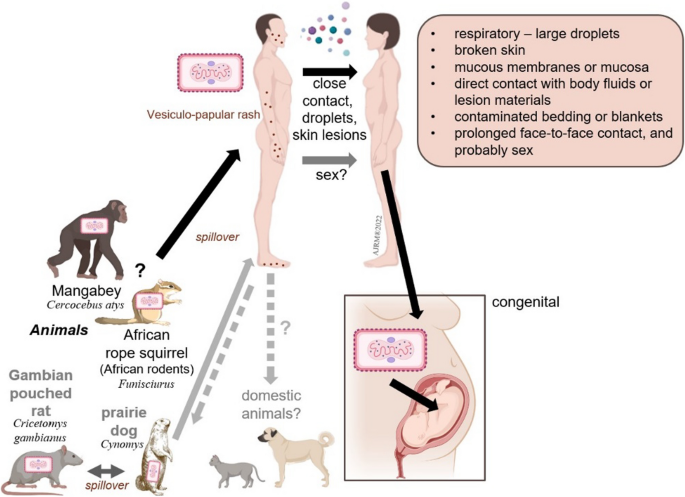

# Reading a csv file monkeypox_df into a dataframe. 


# The csv file contains monkeypox data that includes location of case,case status, country of origin, source, date of confirmation and other relevant information

In [2]:
df=pd.read_csv("data/monkeypox_df.csv",low_memory=False)
df.reset_index(drop=True,inplace=True)
df.head()

ID     Status                             Location    City  Country  \
0  N1  confirmed  Guy's and St Thomas Hospital London  London  England   
1  N2  confirmed  Guy's and St Thomas Hospital London  London  England   
2  N3  confirmed                               London  London  England   
3  N4  confirmed                               London  London  England   
4  N5  confirmed                               London  London  England   

  Country_ISO3  Age Gender  Date_onset Date_confirmation  ...  \
0          GBR  NaN    NaN  2022-04-29        2022-05-06  ...   
1          GBR  NaN    NaN  2022-05-05        2022-05-12  ...   
2          GBR  NaN    NaN  2022-04-30        2022-05-13  ...   
3          GBR  NaN   Male         NaN        2022-05-15  ...   
4          GBR  NaN   Male         NaN        2022-05-15  ...   

                                              Source  \
0  https://www.gov.uk/government/news/monkeypox-c...   
1  https://www.gov.uk/government/news/monkeypox-c...   
2  https://www.gov.uk/government/news/monkeypox-c...   
3  https://www.gov.uk/government/news/monkeypox-c...   
4  https://www.gov.uk/government/news/monkeypox-c...   

                                           Source_II Source_III Source_IV  \
0  https://www.who.int/emergencies/disease-outbre...        NaN       NaN   
1                                                NaN        NaN       NaN   
2                                                NaN        NaN       NaN   
3                                                NaN        NaN       NaN   
4                                                NaN        NaN       NaN   

  Source_V Source_VI Source_VII  Date_entry Date_death Date_last_modified  
0      NaN       NaN        NaN  2022-05-18        NaN         2022-05-18  
1      NaN       NaN        NaN  2022-05-18        NaN         2022-05-18  
2      NaN       NaN        NaN  2022-05-18        NaN         2022-05-18  
3      NaN       NaN        NaN  2022-05-18        NaN         2022-05-18  
4      NaN       NaN        NaN  2022-05-18        NaN         2022-05-18  

[5 rows x 36 columns]

In [3]:
df.shape

(62760, 36)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62760 entries, 0 to 62759
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       62716 non-null  object 
 1   Status                   62759 non-null  object 
 2   Location                 46824 non-null  object 
 3   City                     1331 non-null   object 
 4   Country                  62716 non-null  object 
 5   Country_ISO3             62716 non-null  object 
 6   Age                      2843 non-null   object 
 7   Gender                   3805 non-null   object 
 8   Date_onset               72 non-null     object 
 9   Date_confirmation        59000 non-null  object 
 10  Symptoms                 211 non-null    object 
 11  Hospitalised (Y/N/NA)    314 non-null    object 
 12  Date_hospitalisation     35 non-null     object 
 13  Isolated (Y/N/NA)        441 non-null    object 
 14  Date_isolation        

# We will now proceed to analysing of DataFrame and drop any columns that have high null value.

# Columns  having high Null Values or missing data.


In [5]:
df.isnull().sum()

ID                            44
Status                         1
Location                   15936
City                       61429
Country                       44
Country_ISO3                  44
Age                        59917
Gender                     58955
Date_onset                 62688
Date_confirmation           3760
Symptoms                   62549
Hospitalised (Y/N/NA)      62446
Date_hospitalisation       62725
Isolated (Y/N/NA)          62319
Date_isolation             62744
Outcome                    62664
Contact_comment            62669
Contact_ID                 62733
Contact_location           62754
Travel_history (Y/N/NA)    62403
Travel_history_entry       62721
Travel_history_start       62750
Travel_history_location    62648
Travel_history_country     62663
Genomics_Metadata          62736
Confirmation_method        62661
Source                        44
Source_II                  54904
Source_III                 61886
Source_IV                  62706
Source_V  

# As we can see a large no cells have a high null value count so dropping them one by one will be a tedious task, a convenient way is to automate this.

# we will also analyse Dataframe for high cardinality Columns and drop them too.

In [6]:
df.select_dtypes("object").nunique()

ID                         62716
Status                         5
Location                     797
City                         194
Country                      125
Country_ISO3                 119
Age                           86
Gender                         3
Date_onset                    59
Date_confirmation            132
Symptoms                     106
Hospitalised (Y/N/NA)          2
Date_hospitalisation          29
Isolated (Y/N/NA)              1
Date_isolation                11
Outcome                        2
Contact_comment               61
Contact_location               4
Travel_history (Y/N/NA)        2
Travel_history_entry          34
Travel_history_start           9
Travel_history_location       53
Travel_history_country        38
Genomics_Metadata             11
Confirmation_method           10
Source                      1049
Source_II                    571
Source_III                   112
Source_IV                     13
Date_entry                    93
Date_death

In [7]:
l1=list(df)

In [8]:
df_by_date=df[["Country","Country_ISO3","Gender","Date_confirmation"]]

In [9]:
df_by_date.head()

Country Country_ISO3 Gender Date_confirmation
0  England          GBR    NaN        2022-05-06
1  England          GBR    NaN        2022-05-12
2  England          GBR    NaN        2022-05-13
3  England          GBR   Male        2022-05-15
4  England          GBR   Male        2022-05-15

In [10]:
df_by_date.head()

Country Country_ISO3 Gender Date_confirmation
0  England          GBR    NaN        2022-05-06
1  England          GBR    NaN        2022-05-12
2  England          GBR    NaN        2022-05-13
3  England          GBR   Male        2022-05-15
4  England          GBR   Male        2022-05-15

In [11]:
df_by_date["Date_confirmation"]=pd.to_datetime(df_by_date['Date_confirmation'])

/tmp/ipykernel_20531/1915267231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_date["Date_confirmation"]=pd.to_datetime(df_by_date['Date_confirmation'])


In [12]:
df_by_date.sort_values("Date_confirmation")

Country Country_ISO3 Gender Date_confirmation
59287                           Nigeria          NGA    NaN        2022-01-31
59288                           Nigeria          NGA    NaN        2022-01-31
59289                           Nigeria          NGA    NaN        2022-01-31
59754                          Cameroon          CMR    NaN        2022-02-17
59755                          Cameroon          CMR    NaN        2022-02-17
...                                 ...          ...    ...               ...
62755  Democratic Republic Of The Congo          COD    NaN               NaT
62756  Democratic Republic Of The Congo          COD    NaN               NaT
62757  Democratic Republic Of The Congo          COD    NaN               NaT
62758  Democratic Republic Of The Congo          COD    NaN               NaT
62759  Democratic Republic Of The Congo          COD    NaN               NaT

[62760 rows x 4 columns]

In [13]:
df_by_date.to_csv("data/date_cases.csv")
                    

In [14]:
df["Status"].unique()

array(['confirmed', 'discarded', 'suspected', nan, 'omit_error',
       'https://www.publichealthontario.ca/-/media/Documents/M/2022/monkeypox-episummary.pdf?sc_lang=en'],
      dtype=object)

In [15]:
print(len(l1))

36


In [16]:
print(l1)

['ID', 'Status', 'Location', 'City', 'Country', 'Country_ISO3', 'Age', 'Gender', 'Date_onset', 'Date_confirmation', 'Symptoms', 'Hospitalised (Y/N/NA)', 'Date_hospitalisation', 'Isolated (Y/N/NA)', 'Date_isolation', 'Outcome', 'Contact_comment', 'Contact_ID', 'Contact_location', 'Travel_history (Y/N/NA)', 'Travel_history_entry', 'Travel_history_start', 'Travel_history_location', 'Travel_history_country', 'Genomics_Metadata', 'Confirmation_method', 'Source', 'Source_II', 'Source_III', 'Source_IV', 'Source_V', 'Source_VI', 'Source_VII', 'Date_entry', 'Date_death', 'Date_last_modified']


# Now we will build our wrangle function that takes file name as an argument and loads it into a dataframe than drops the unwanted columns and returns a clean DataFrame.

# Below is the wrangle function we have created we have stored the column names that have high null value percentage into a list and passed the list to drop columns at once.

In [17]:
#wrangle function to clean the dataframe
def wrangle(path):
    df=pd.read_csv(path,low_memory=False)
    l1=list(df) #list containing column names of the DataFrame
    #drop null values
    df.dropna(subset="Status",inplace=True)
    df[["Country","Date_confirmation"]]
    #for null values grater than 80%
    l2=[] #empty list to store column names with high null value count 
    for column in l1:
        per=0
        x=df[column].isnull().sum()
        per=(x/len(df) *100)
        if per >= 95:
            if column == "Symptoms" or column=="Age" or column=="Gender":
                continue
            else:
                l2.append(column)
    df.drop(columns=l2,inplace=True)
    df.drop(columns=["Date_last_modified","Date_entry","Source_II"],inplace=True)
    
    
    return df

In [18]:
#passing the csv file to wrangle function and loading it into DataFrame
df= wrangle("data/monkeypox_df.csv")

# describe statistics of our cleaned dataframe

In [19]:
df.describe()

ID     Status    Location        Country Country_ISO3    Age  \
count   62716      62759       46824          62716        62716   2843   
unique  62716          5         797            125          119     86   
top        N1  confirmed  California  United States          USA  20-69   
freq        1      58641        4286          22091        22091    616   

       Gender Date_confirmation               Symptoms  \
count    3804             58999                    211   
unique      2               132                    106   
top      Male        2022-08-22  genital ulcer lesions   
freq     2513              2063                     30   

                                                   Source  
count                                               62716  
unique                                               1049  
top     https://www.cdc.gov/poxvirus/monkeypox/respons...  
freq                                                22088

In [20]:
df.head()

ID     Status                             Location  Country Country_ISO3  \
0  N1  confirmed  Guy's and St Thomas Hospital London  England          GBR   
1  N2  confirmed  Guy's and St Thomas Hospital London  England          GBR   
2  N3  confirmed                               London  England          GBR   
3  N4  confirmed                               London  England          GBR   
4  N5  confirmed                               London  England          GBR   

   Age Gender Date_confirmation        Symptoms  \
0  NaN    NaN        2022-05-06            rash   
1  NaN    NaN        2022-05-12            rash   
2  NaN    NaN        2022-05-13  vesicular rash   
3  NaN   Male        2022-05-15  vesicular rash   
4  NaN   Male        2022-05-15  vesicular rash   

                                              Source  
0  https://www.gov.uk/government/news/monkeypox-c...  
1  https://www.gov.uk/government/news/monkeypox-c...  
2  https://www.gov.uk/government/news/monkeypox-c...  
3  https://www.gov.uk/government/news/monkeypox-c...  
4  https://www.gov.uk/government/news/monkeypox-c...

# writing the cleaned dataframe to a csv file 

In [21]:
df.to_csv ('data/monkeypox_df_clean.csv', index =None, header=True)

# checking for number of countries in our dataframe

In [22]:
df["Country"].head()

0    England
1    England
2    England
3    England
4    England
Name: Country, dtype: object

In [23]:
df["Country"].unique()

array(['England', 'Portugal', 'Spain', 'United States', 'Canada',
       'Sweden', 'Italy', 'France', 'Belgium', 'Australia', 'Germany',
       'Netherlands', 'Israel', 'Switzerland', 'Greece', 'Austria',
       'Argentina', 'Denmark', 'Morocco', 'Slovenia', 'Scotland',
       'Czech Republic', 'United Arab Emirates', 'Finland', 'Wales',
       'Northern Ireland', 'Sudan', 'Bolivia', 'Iran', 'Ecuador', 'Malta',
       'Ireland', 'Mexico', 'Pakistan', 'French Guiana', 'Thailand',
       'Peru', 'Brazil', 'Malaysia', 'Hungary', 'Norway', 'Paraguay',
       'Costa Rica', 'Gibraltar', 'Mauritius', 'Haiti', 'Uruguay',
       'Latvia', 'Cayman Islands', 'Kosovo', 'Turkey', 'Bahamas', 'Ghana',
       'India', 'Iceland', 'Poland', 'Bangladesh', 'Uganda', 'Cambodia',
       'Malawi', 'Venezuela', 'Romania', 'Georgia', 'Slovakia',
       'Luxembourg', 'Nepal', 'Chile', 'Serbia', 'Lebanon', 'South Korea',
       'Singapore', 'South Africa', 'Taiwan', 'Colombia', 'Croatia',
       'Bulgaria', 'Som

In [24]:
df["Country"].nunique()

125

In [25]:
df_country=df[["Country_ISO3","Country"]]

In [26]:
df_country.isnull().sum()

Country_ISO3    43
Country         43
dtype: int64

As there are very few null values no need to remove them

# Making a dataframe with no of cases per country

In [27]:
df_by_country=df_country["Country"].value_counts().to_frame()

In [28]:
df_by_country.head(20)

Country
United States                       22091
Spain                                7070
Brazil                               6076
France                               3803
Germany                              3533
England                              3320
Democratic Republic Of The Congo     2877
Peru                                 1940
Canada                               1419
Colombia                             1260
Netherlands                          1195
Portugal                              898
Italy                                 814
Mexico                                789
Belgium                               726
Nigeria                               530
Chile                                 488
Switzerland                           485
Ghana                                 394
Austria                               286

In [29]:
df_by_country.rename(columns={"Country":"cases"},inplace=True)
df_by_country.index.rename('Country', inplace=True)
df_by_country.head()

cases
Country             
United States  22091
Spain           7070
Brazil          6076
France          3803
Germany         3533

In [30]:
df_by_country = df_by_country.rename_axis('Country').reset_index()
df_by_country.head(20)

Country  cases
0                      United States  22091
1                              Spain   7070
2                             Brazil   6076
3                             France   3803
4                            Germany   3533
5                            England   3320
6   Democratic Republic Of The Congo   2877
7                               Peru   1940
8                             Canada   1419
9                           Colombia   1260
10                       Netherlands   1195
11                          Portugal    898
12                             Italy    814
13                            Mexico    789
14                           Belgium    726
15                           Nigeria    530
16                             Chile    488
17                       Switzerland    485
18                             Ghana    394
19                           Austria    286

# Plotting a scatter plot for the first 10 countries with maximum no of cases

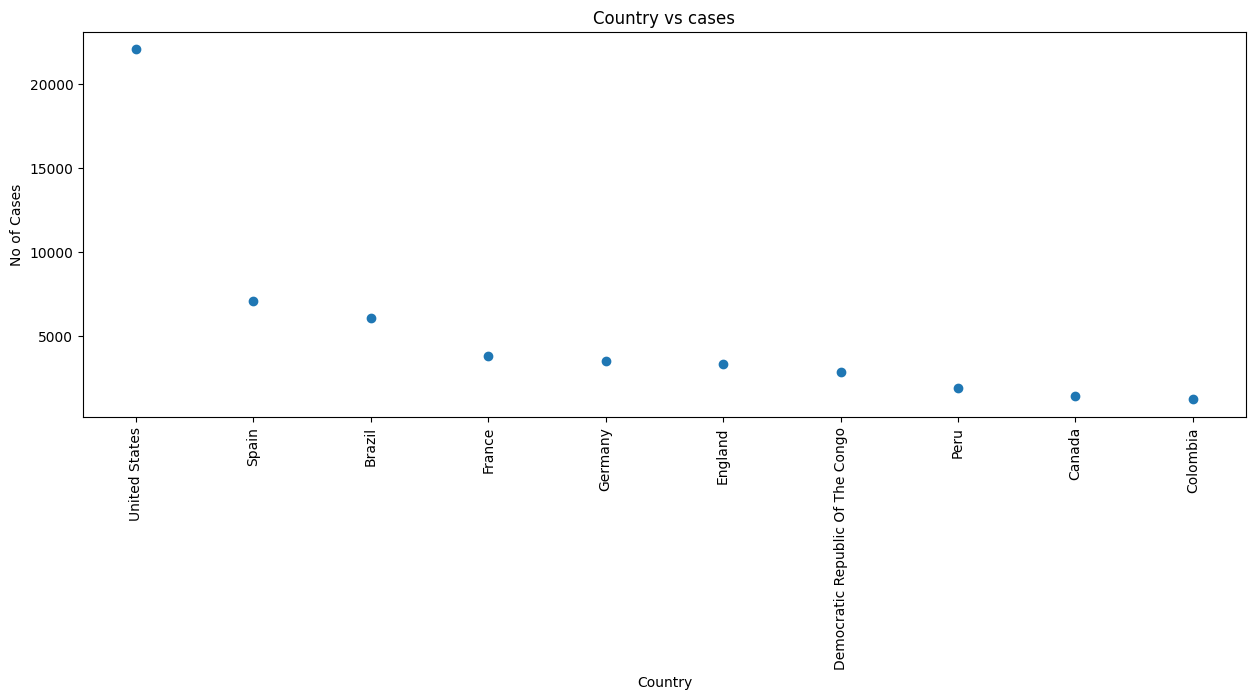

In [31]:
plt.figure(figsize=(15, 5))
plt.scatter(x=df_by_country["Country"][0:10],y=df_by_country["cases"][0:10])
plt.xlabel("Country")
plt.xticks(rotation = 90)
plt.ylabel("No of Cases")
plt.title("Country vs cases");

# Plotting a bar graph showing no of cases in Different countries.

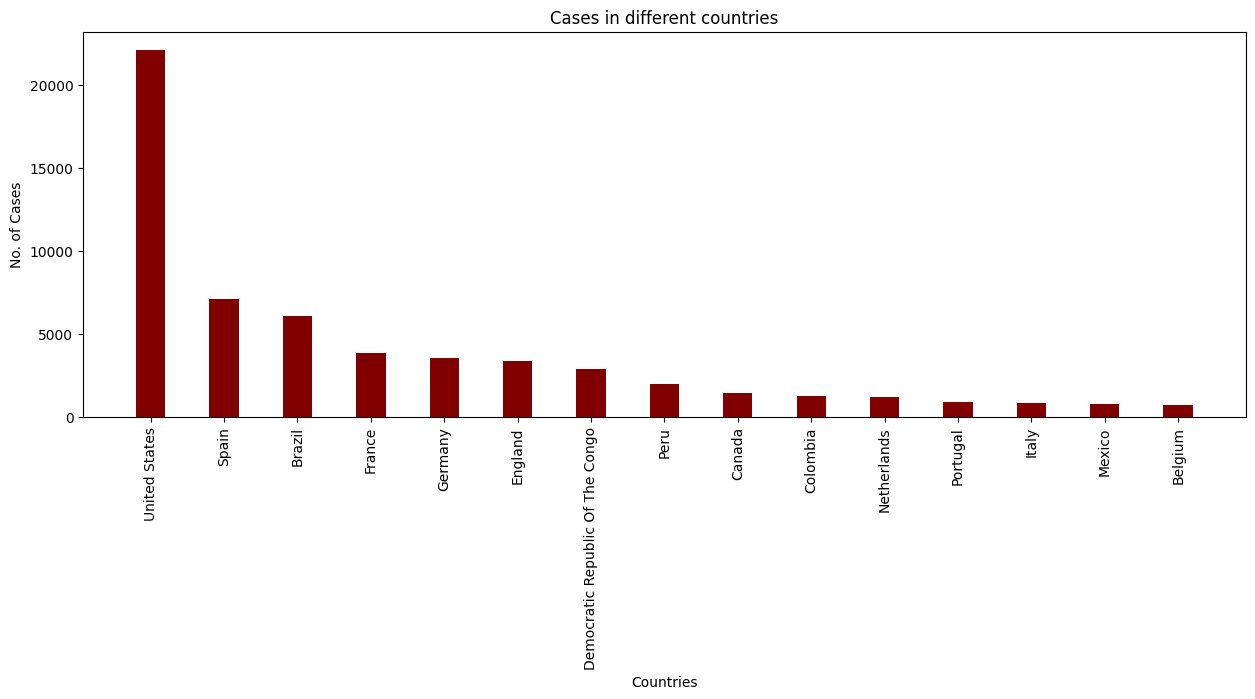

In [32]:
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(df_by_country["Country"][0:15],df_by_country["cases"][0:15] , color ='maroon',
        width = 0.4)
 
plt.xlabel("Countries")
plt.xticks(rotation = 90)
plt.ylabel("No. of Cases")
plt.title("Cases in different countries")
plt.show()

# reading a csv file that contains lattitudes and longitudes of the countries and also 3 letter country codes 

In [33]:
df_country_data=pd.read_csv("data/Country_data.csv")

In [34]:
df_country_data.head()

espanol nombreiso_ingles nombreiso_frances alfa2 alfa3  codiso  latitud  \
0  AFGANISTÁN      Afghanistan      Afghanistan     AF   AFG       4     33.0   
1       ÅLAND    Åland Islands             Åland    AX   ALA     248     60.2   
2     ALBANIA          Albania          Albanie     AL   ALB       8     41.0   
3    ALEMANIA          Germany        Allemagne     DE   DEU     276     51.0   
4     ANDORRA          Andorra          Andorre     AD   AND      20     42.5   

   longitud  
0      65.0  
1      19.9  
2      20.0  
3       9.0  
4       1.6

# ranaming alfa3 as Country_ISO3

In [35]:
df_country_data.rename(columns={"alfa3":"Country_ISO3"},inplace=True)

In [36]:
df_country_data.rename(columns={"nombreiso_ingles":"Country"},inplace=True)

In [37]:
l4=list(df_country_data["Country"])

In [38]:
print(l4)

['Afghanistan', 'Åland Islands', 'Albania', 'Germany', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Saudi Arabia', 'Algeria', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas ', 'Bangladesh', 'Barbados', 'Bahrain', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Belarus', 'Myanmar', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Bhutan', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Bonaire, Sint Eustatius and Saba', 'Qatar', 'Chad', 'Chile', 'China', 'Cyprus', 'Holy See ', 'Colombia', 'Comoros ', 'Korea ', 'Republic of Korea', "Côte d'Ivoire", 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Denmark', 'Dominica', 'Ecuador', 'Egypt', 'El Salvador', 'United Arab Emirates', 'Eritrea', 'Slovakia', 'Slovenia', 'Spain', 'Palestine, State of', 'United States', 'Estonia', 'Ethiopia', 'Philippines ', 'Finland', 'Fiji', 'France', 'Gabon', 'Gambia ', 'Georgia', 'Ghana', 'Gib

# Performing a left merge on the two data frames to include lattitude and longitude data into the first Dataframe df_by_country.

In [39]:
df3= df_by_country.merge(df_country_data
    [["Country","Country_ISO3","latitud","longitud"]],on="Country", how="left")

In [40]:
df3.to_csv ('data/monkeypox_country_lat_lon.csv', index = None, header=True)

In [41]:
df3.head(60)

Country  cases Country_ISO3  latitud  longitud
0                      United States  22091          USA  38.0000  -97.0000
1                              Spain   7070          ESP  40.0000   -4.0000
2                             Brazil   6076          BRA -10.0000  -55.0000
3                             France   3803          FRA  46.0000    2.0000
4                            Germany   3533          DEU  51.0000    9.0000
5                            England   3320          GBR  54.0000   -2.0000
6   Democratic Republic Of The Congo   2877          COG  -1.0000   15.0000
7                               Peru   1940          PER -10.0000  -76.0000
8                             Canada   1419          CAN  60.0000  -95.0000
9                           Colombia   1260          COL   4.7465  -75.0974
10                       Netherlands   1195          NLD  52.5000    5.7500
11                          Portugal    898          PRT  39.5000   -8.0000
12                             Italy    814          ITA  42.8333   12.8333
13                            Mexico    789          MEX  23.0000 -102.0000
14                           Belgium    726          BEL  50.8333    4.0000
15                           Nigeria    530          NGA  10.0000    8.0000
16                             Chile    488          CHL -30.0000  -71.0000
17                       Switzerland    485          CHE  47.0000    8.0000
18                             Ghana    394          GHA   8.0000   -2.0000
19                           Austria    286          AUT  47.3333   13.3333
20                            Israel    247          ISR  31.5000   34.7500
21                         Argentina    223          ARG -34.0000  -64.0000
22                           Denmark    183          DNK  56.0000   10.0000
23                            Sweden    168          SWE  62.0000   15.0000
24                           Ireland    160          IRL  53.0000   -8.0000
25                       Puerto Rico    154          PRI  18.2500  -66.5000
26                            Poland    145          POL  52.0000   20.0000
27                         Australia    132          AUS -27.0000  133.0000
28                           Bolivia    122          BOL -17.0000  -65.0000
29                          Scotland     89          NaN      NaN       NaN
30                            Norway     83          NOR  62.0000   10.0000
31                           Hungary     71          HUN  47.0000   20.0000
32                            Greece     67          GRC  39.0000   22.0000
33                           Ecuador     62          ECU  -2.0000  -77.5000
34                    Czech Republic     58          NaN      NaN       NaN
35                        Luxembourg     54          LUX  49.7500    6.1667
36                          Slovenia     45          SVN  46.0000   15.0000
37                             Wales     45          NaN      NaN       NaN
38                           Romania     36          ROU  46.0000   25.0000
39                          Cameroon     34          CMR   6.0000   12.0000
40                             Malta     33          MLT  35.8333   14.5833
41                            Serbia     31          SRB  44.0000   21.0000
42                           Finland     30          FIN  64.0000   26.0000
43                  Northern Ireland     30          NaN      NaN       NaN
44                           Croatia     27          HRV  45.1667   15.5000
45          Central African Republic     17          NaN      NaN       NaN
46                          Thailand     16          THA  15.0000  100.0000
47                         Singapore     16          SGP   1.3667  103.8000
48              United Arab Emirates     16          ARE  24.0000   54.0000
49                          Slovakia     15          SVK  48.6667   19.5000
50                            Turkey     15          TUR  39.0000   35.0000
51                           Jamaica     12          JAM  18.2500  -77.5000
5

# Plotting the cases data on a world map based on lattitude and longitudes

In [42]:
fig = px.scatter_mapbox(
    df3,  # Our DataFrame
    lat="latitud",
    lon="longitud",
    width=1000,  # Width of map
    height=600,  # Height of map
    color= "cases",
    hover_data=["cases","Country"],  # Display no of cases when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [83]:
fig = px.choropleth(df3,
                    locations = "Country_ISO3",
                    color = "cases",
                    hover_name = "Country",
                    color_continuous_scale = ["yellow", "#cbd6e4", "#bfcbdb", "#b3bfd1", "#a4a2a8", "#df8879", "#c86558", "#b04238", "red"],
                    projection = 'natural earth',
                    template = 'plotly_dark',
                    title = 'Geographical Distribution of Confirmed Cases<br><sub>Natural Projection</sub>',
                    height = 500,
                    width = 820,
                   )

fig.update_geos(lataxis_showgrid = True,
                lonaxis_showgrid = True,
                showcountries = True,
               )


In [44]:
fig = px.choropleth(df3,
                    locations = "Country_ISO3",
                    color = "cases",
                    hover_name = "Country",
                    color_continuous_scale = ["yellow", "#cbd6e4", "#bfcbdb", "#b3bfd1", "#a4a2a8", "#df8879", "#c86558", "#b04238", "red"],
                    projection = 'orthographic',
                    #template = 'plotly_dark',
                    title = 'Geographical Distribution of Confirmed Cases<br><sub>Natural Projection</sub>',
                    height = 800,
                    width = 1120,
                   )

fig.update_geos(lataxis_showgrid = True,
                lonaxis_showgrid = True,
                showcountries = True,
               )


# Using Machine learning to classify the case as male or female 

# import required libraries for logistic regression

In [45]:
from category_encoders import OneHotEncoder
from IPython.display import VimeoVideo
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

# copying the required columns in the Dataframe

In [46]:
df_machine=wrangle("data/monkeypox_df.csv")

In [47]:
df_machine.head()

ID     Status                             Location  Country Country_ISO3  \
0  N1  confirmed  Guy's and St Thomas Hospital London  England          GBR   
1  N2  confirmed  Guy's and St Thomas Hospital London  England          GBR   
2  N3  confirmed                               London  England          GBR   
3  N4  confirmed                               London  England          GBR   
4  N5  confirmed                               London  England          GBR   

   Age Gender Date_confirmation        Symptoms  \
0  NaN    NaN        2022-05-06            rash   
1  NaN    NaN        2022-05-12            rash   
2  NaN    NaN        2022-05-13  vesicular rash   
3  NaN   Male        2022-05-15  vesicular rash   
4  NaN   Male        2022-05-15  vesicular rash   

                                              Source  
0  https://www.gov.uk/government/news/monkeypox-c...  
1  https://www.gov.uk/government/news/monkeypox-c...  
2  https://www.gov.uk/government/news/monkeypox-c...  
3  https://www.gov.uk/government/news/monkeypox-c...  
4  https://www.gov.uk/government/news/monkeypox-c...

In [48]:
df_machine.dropna(subset="Gender",inplace=True)

In [49]:
df_machine["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [50]:
df_machine.head()

ID     Status   Location   Country Country_ISO3    Age Gender  \
3  N4  confirmed     London   England          GBR    NaN   Male   
4  N5  confirmed     London   England          GBR    NaN   Male   
5  N6  confirmed     London   England          GBR    NaN   Male   
6  N7  confirmed  Newcastle   England          GBR    NaN   Male   
7  N8  confirmed     Lisbon  Portugal          PRT  20-44   Male   

  Date_confirmation                          Symptoms  \
3        2022-05-15                    vesicular rash   
4        2022-05-15                    vesicular rash   
5        2022-05-15                    vesicular rash   
6        2022-05-15                    vesicular rash   
7        2022-05-17  skin lesions, ulcerative lesions   

                                              Source  
3  https://www.gov.uk/government/news/monkeypox-c...  
4  https://www.gov.uk/government/news/monkeypox-c...  
5  https://www.gov.uk/government/news/monkeypox-c...  
6  https://www.gov.uk/government/news/monkeypox-c...  
7  https://cnnportugal.iol.pt/geral/portugal-tem-...

In [51]:
target="Gender"
X=df_machine.drop(columns=target)
y= df_machine[target]

# Splitting Data into train and test set

In [52]:
X_train,X_test,y_train,y_test = train_test_split(
X,y,test_size=0.3,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2662, 9)
y_train shape: (2662,)
X_test shape: (1142, 9)
y_test shape: (1142,)


# Baseline Accuracy

In [53]:
y_train.value_counts(normalize=True).max()

0.6543951915852743

In [54]:
# Build model
model = make_pipeline(
        OneHotEncoder(use_cat_names=True),
        LogisticRegression())
# Fit model to training data
model.fit(X_train,y_train)

/home/shuaib/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/shuaib/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/shuaib/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/shuaib/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/shuaib/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/shuaib/.local/lib/python3.10/site-packages/category_encoders/one_hot.

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['ID', 'Status', 'Location', 'Country',
                                     'Country_ISO3', 'Age', 'Date_confirmation',
                                     'Symptoms', 'Source'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression())])

In [55]:
acc_train = accuracy_score(y_train,model.predict(X_train))
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 3))
print("Test Accuracy:", round(acc_test, 3))

Training Accuracy: 0.996
Test Accuracy: 0.961


# Decision Tree

Splitting Data into Validation Set

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
X,y,test_size=0.3,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2662, 9)
y_train shape: (2662,)
X_test shape: (1142, 9)
y_test shape: (1142,)


In [57]:
X_train, X_val, y_train, y_val = train_test_split(
X_train,y_train,test_size=0.3,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1863, 9)
y_train shape: (1863,)
X_test shape: (1142, 9)
y_test shape: (1142,)


In [79]:
# Build model
model = make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(max_depth=18,random_state=42))
# Fit model to training data
model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['ID', 'Status', 'Location', 'Country',
                                      'Country_ISO3', 'Age',
                                      'Date_confirmation', 'Symptoms',
                                      'Source'],
                                mapping=[{'col': 'ID', 'data_type': dtype('O'),
                                          'mapping': N6817        1
N16920       2
N13108       3
N41093       4
N40825       5
          ... 
N41025    1860
N40474    1861
N41033    1862
N40510    1863
NaN         -2
Length: 1864, dtype: int64},
                                         {'col': 'Status',
                                          'data_type': dtype('O'...
https://prensa.gob.gt/comunicado/ministerio-de-salud-confirma-dos-casos-mas-de-viruela-del-mono                                                                                              291
https://www.livemint.com/news/india/ups-monkeypox-case-latest-update-5-yr-old-girl-tests-negative-11654593581856.html                                                                        292
https://ncdc.gov.ng/themes/common/files/sitreps/ed4f642dd1b5b1f1adf277e1d48a98f8.pdf                                                                                                         293
NaN                                                                                                                                                                                           -2
Length: 294, dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=18, random_state=42))])

In [80]:
acc_train = accuracy_score(y_train,model.predict(X_train))
acc_val = model.score(X_val,y_val)

print("Training Accuracy:", round(acc_train, 3))
print("Validation Accuracy:", round(acc_val, 3))

Training Accuracy: 0.997
Validation Accuracy: 0.934


In [81]:
tree_depth =model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 18


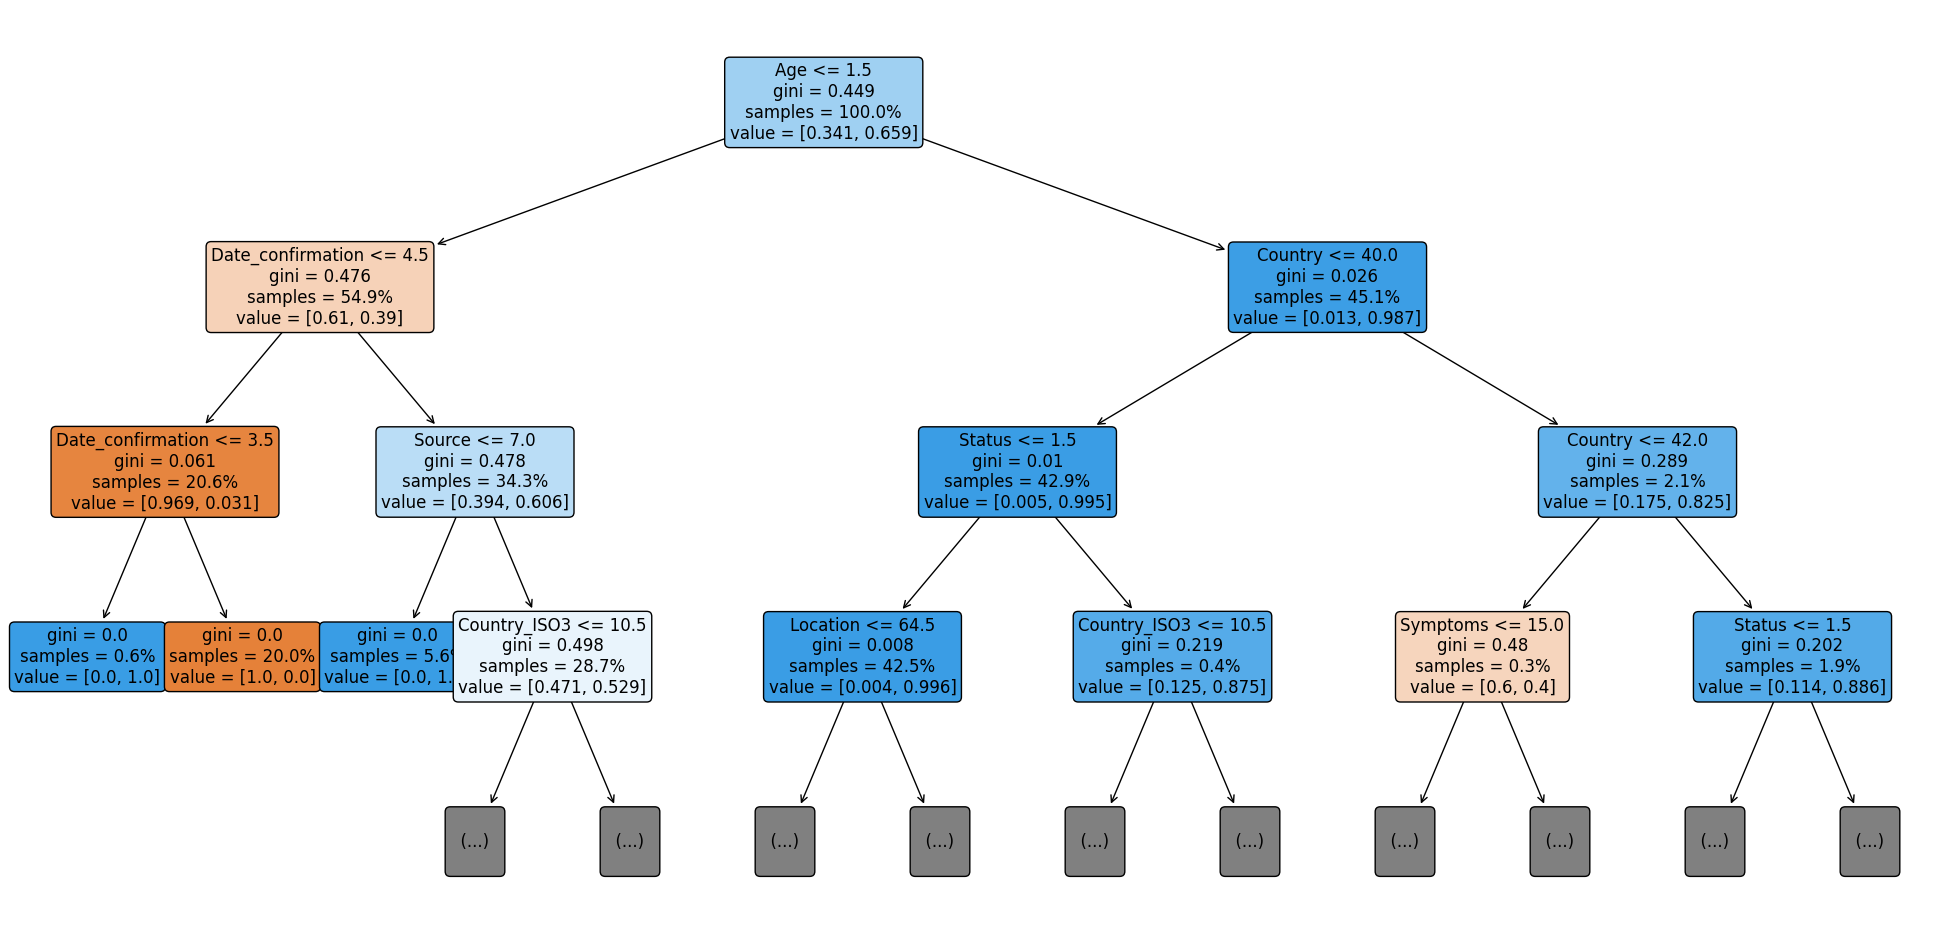

In [82]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

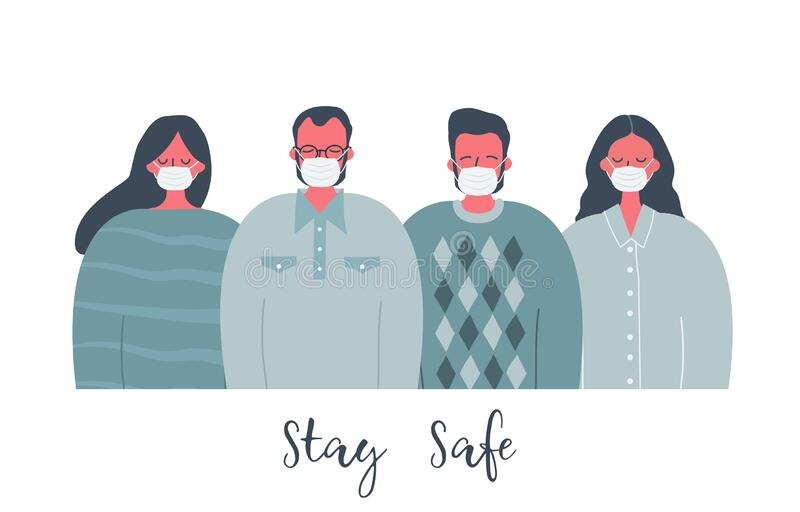

# Shuaib2101409@st.jmi.ac.in                                      Thank you.